In [7]:
#Question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# a)
df = pd.read_csv("heart_disease.csv")
display(df)


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [5]:
# b)
# Overview of the data set
# i)
print(f" Total Columns : {len(df.columns)}")
print(f" Total Rows : {len(df.index)}")
# ii)
display(df.describe())
# iii)
print(f"Distinct values in the Department: {df['Gender'].nunique()}")
print(f"Distinct values in the Promotion Status: {df['Smoking'].nunique()}")

 Total Columns : 21
 Total Rows : 10000


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


Distinct values in the Department: 2
Distinct values in the Promotion Status: 2


In [6]:
# Handling Missing Values
# i)
print(f"Finding dataset contain any missing value or not: \n {df.isnull().sum()}")
# ii)
# Numerical Data: Replace missing values with the mean (for normally distributed data) 
# or median (for skewed data).The median is more robust to outliers.

# Categorical Data: Replace missing values with the mode (most frequent value), 
# as it represents the most common category.

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
          df[column] = df[column].fillna(df[column].mean())
    else:
         df[column]= df[column].fillna(df[column].mode())

Finding dataset contain any missing value or not: 
 Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64


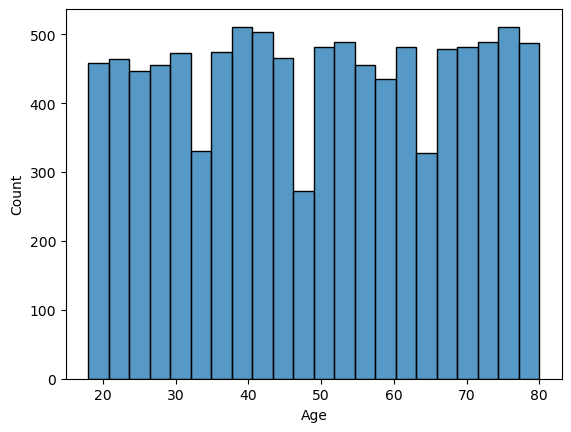

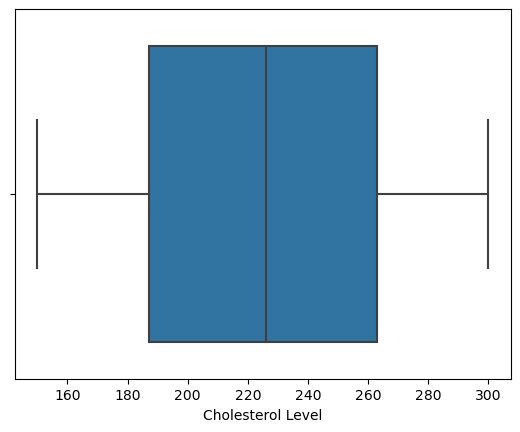

In [9]:
# d)
# Visual Analysis and Interpretation:
# i)
sns.histplot(x='Age',data = df)
plt.show()
# ii)
# df1 = df.groupby('Department')
# dep_counts = df1.size()
# sns.barplot(x=dep_counts.index, y=dep_counts.values)
# plt.show()
# iii)
# Median (230): Middle cholesterol level.
# IQR (200 to 260): 50% of values fall in this range.
# No Outliers: Data is evenly spread.
# Distribution: Fairly symmetrical, moderate variability.
sns.boxplot(x="Cholesterol Level", data = df)
plt.show()